<a href="https://colab.research.google.com/github/NickLawrence0025/TTA-Home-Learning/blob/main/V_basic_Linear_Regression_Model_for_honey_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


In [13]:
df = pd.read_csv("honeyproduction.csv")
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


The data shows the total honey production for each state, but to get an overall view of honey production across the US, we can aggregate all of the production years.

Total honey production per year: 

In [4]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
print(prod_per_year)

    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


Reshape the data:

In [5]:
X = prod_per_year['year']
X = X.values.reshape(-1,1)

Create a variable called y for the total_prod column

In [6]:
y = prod_per_year['totalprod']

create a scatter plot:

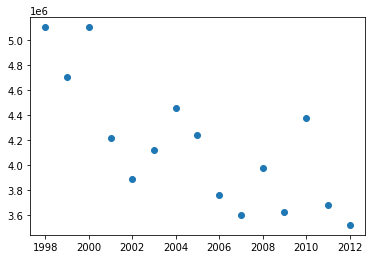

In [7]:
plt.scatter(X,y)
plt.show()

Create a linear regression model, and then fit to the data:

In [8]:
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

print the coefficients and the intercept:

In [9]:
print(regr.coef_[0])
print(regr.intercept_)

-88303.18915238192
181208083.10732976


The first number shows that the gradient of honey production in relation the time series.  The second number represents honey production for the first recorded year.

Calculate a gradient line through all of the points on the scatter plot:

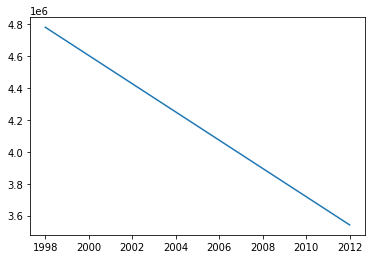

In [10]:
y_predict = regr.predict(X)
plt.plot(X,y_predict)
plt.show()

Create an array for a series of years from 2013 to 2051, reshape it. 

In [11]:
X_future = np.array(range(2013,2051))
X_future = X_future.reshape(-1,1)

Taking the linear regression model that we have assigned to the variable 'regr', predict a series of production values that will be based on the coefficient from the fitted model. 

Then create a plot based on those values. 

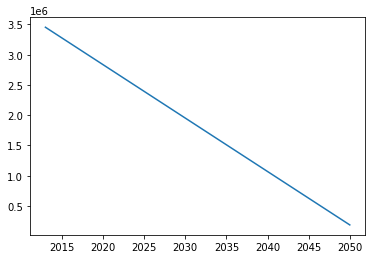

In [12]:
future_predict = regr.predict(X_future)
plt.plot(X_future,future_predict)
plt.show()

Realistically, production value is unlikely to degrade in such a neat fashion, but the linear regression model gives us an approximate trend line where we can predict approximate values for any of the years between 2013 and 2050. 